# **Informações sobre o dataset:**

Este conjunto de dados contém informações médicas e de estilo de vida de 1500 pacientes, projetado para prever a presença de câncer com base em diversas características. O conjunto de dados é estruturado para fornecer um desafio realista para a modelagem preditiva na área médica.


<br><br>


**Age:** Valores inteiros que representam a idade do paciente, variando de 20 a 80 anos.


**Gender:** Valores binários que representam o gênero, onde 0 indica Masculino e 1 indica Feminino.


**BMI:** Valores contínuos que representam o Índice de Massa Corporal (IMC), variando de 15 a 40.


**Smoking:** Valores binários que indicam se você fuma ou não, onde 0 significa Não e 1 significa Sim.


**GeneticRisk**: Valores categóricos que representam os níveis de risco genético para câncer, sendo 0 indicativo de baixo risco, 1 de risco médio e 2 de risco alto.


**PhysicalActivity**: Valores contínuos que representam o número de horas por semana dedicadas a atividades físicas, variando de 0 a 10.


**AlcoholIntake**: Valores contínuos que representam o número de unidades de álcool consumidas por semana, variando de 0 a 5.


**CancerHistory**: Valores binários que indicam se o paciente tem histórico pessoal de câncer, onde 0 significa Não e 1 significa Sim.


**Diagnosis**: Valores binários que indicam o status do diagnóstico de câncer, onde 0 indica Sem Câncer e 1 indica Câncer.


In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [21]:
df = pd.read_csv('cancer.csv')

In [22]:
df

,Age,Gender,BMI,Smoking,GeneticRisk,PhysicalActivity,AlcoholIntake,CancerHistory,Diagnosis
0,58,1,16.085313,0,1,8.146251,4.148219,1,1
1,71,0,30.828784,0,1,9.361630,3.519683,0,0
2,48,1,38.785084,0,2,5.135179,4.728368,0,1
3,34,0,30.040296,0,0,9.502792,2.044636,0,0
4,62,1,35.479721,0,0,5.356890,3.309849,0,1
...,...,...,...,...,...,...,...,...,...
1495,62,1,25.090025,0,0,9.892167,1.284158,0,1
1496,31,0,33.447125,0,1,1.668297,2.280636,1,1
1497,63,1,32.613861,1,1,0.466848,0.150101,0,1
1498,55,0,25.568216,0,0,7.795317,1.986138,1,1


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               1500 non-null   int64  
 1   Gender            1500 non-null   int64  
 2   BMI               1500 non-null   float64
 3   Smoking           1500 non-null   int64  
 4   GeneticRisk       1500 non-null   int64  
 5   PhysicalActivity  1500 non-null   float64
 6   AlcoholIntake     1500 non-null   float64
 7   CancerHistory     1500 non-null   int64  
 8   Diagnosis         1500 non-null   int64  
dtypes: float64(3), int64(6)
memory usage: 105.6 KB


# **Análise Exploratória**

## 1. Quantas linhas e colunas possui o dataset? Existem nulos?

In [24]:
print(f"O dataset possui {df.shape[0]} linhas e {df.shape[1]} colunas")
duplicados = df.duplicated()
print(f"Valor duplicado: {duplicados}")
df.isnull().any()

O dataset possui 1500 linhas e 9 colunas
Valor duplicado: 0       False
1       False
2       False
3       False
4       False
        ...  
1495    False
1496    False
1497    False
1498    False
1499    False
Length: 1500, dtype: bool


Age                 False
Gender              False
BMI                 False
Smoking             False
GeneticRisk         False
PhysicalActivity    False
AlcoholIntake       False
CancerHistory       False
Diagnosis           False
dtype: bool

## 2. Qual a idade mais frequente do conjunto de dados?

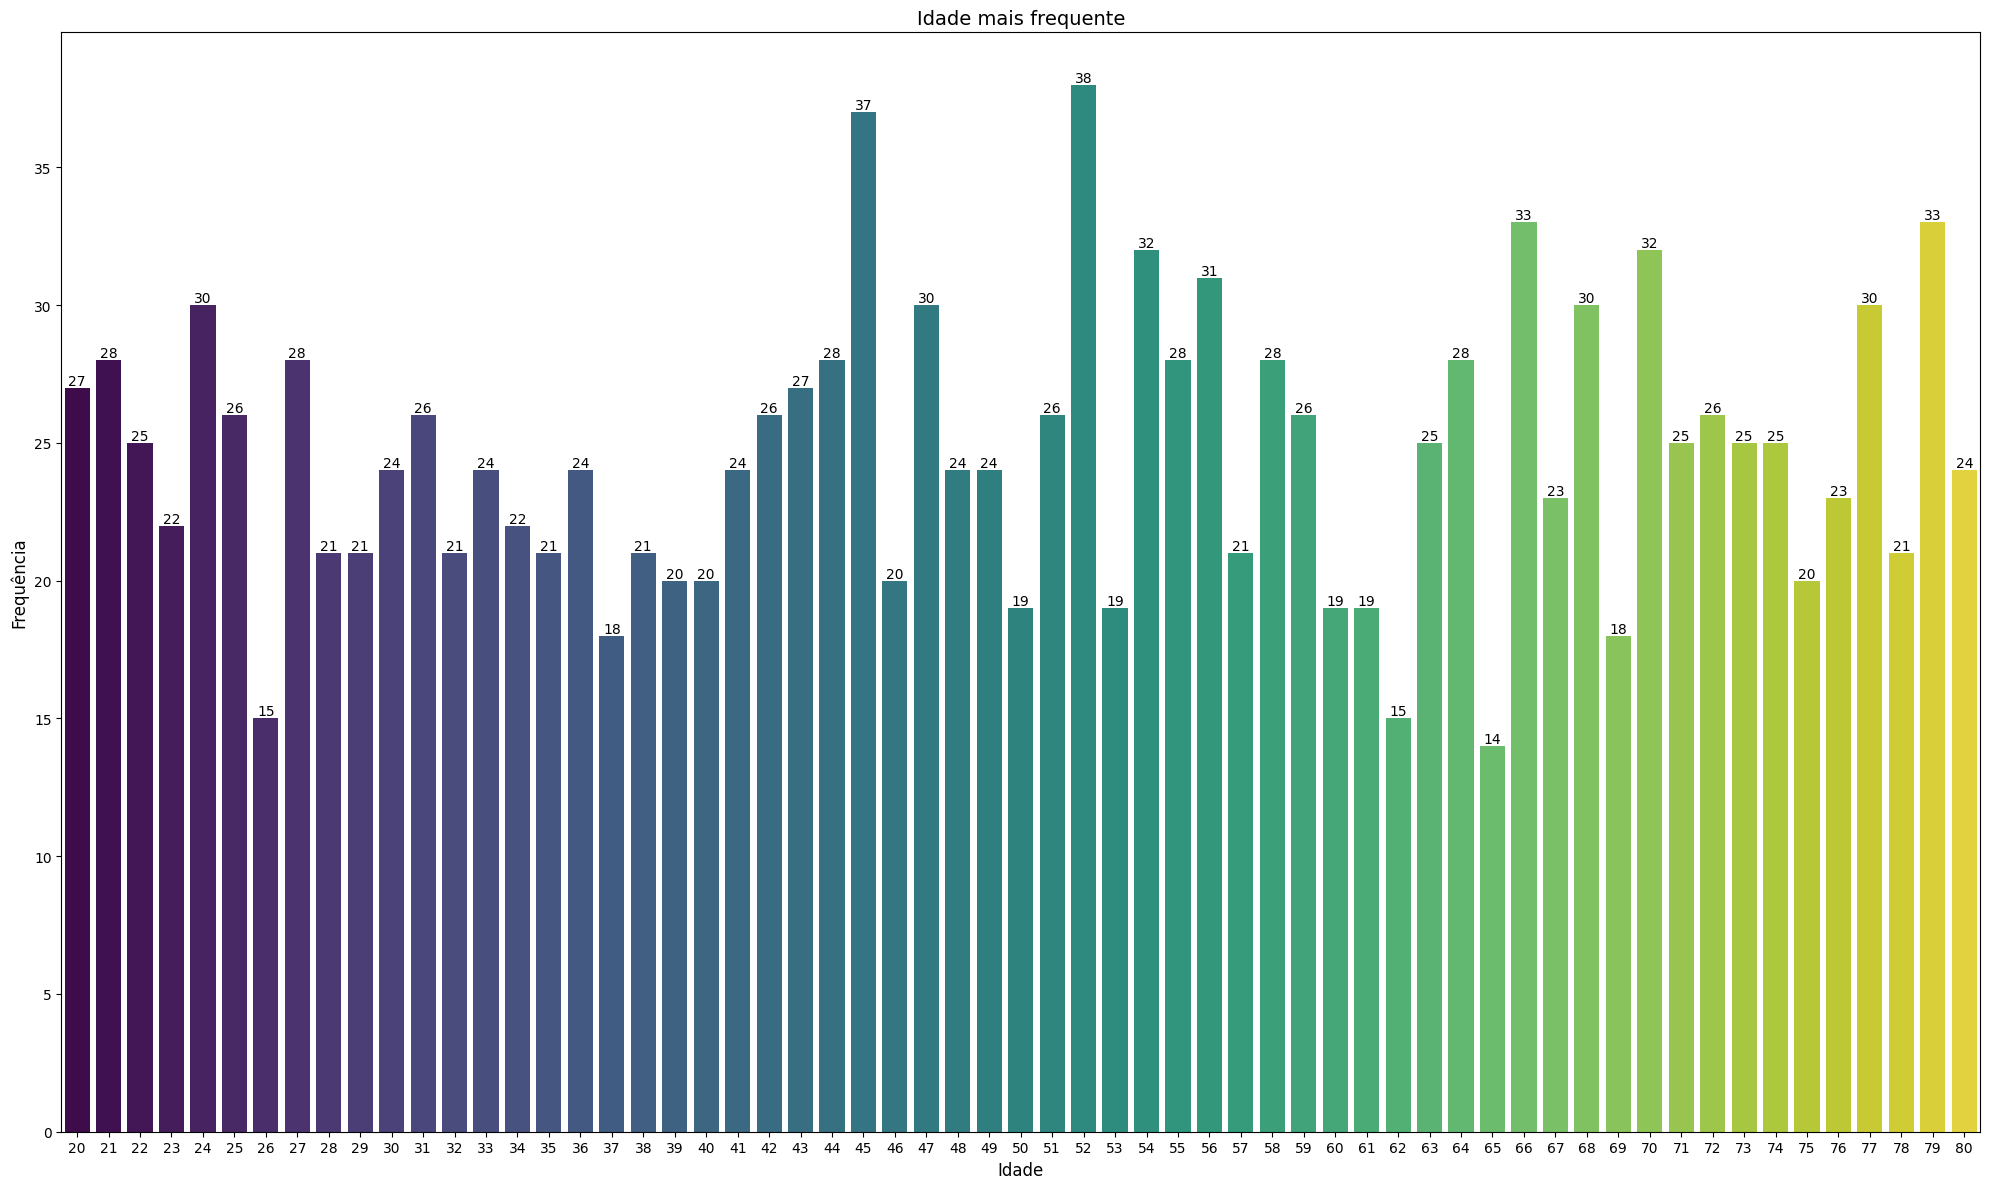

In [25]:

contagem_idade = df['Age'].value_counts().reset_index()
contagem_idade.columns = ['Age', 'Frequência']
 
plt.figure(figsize=(20, 12))
 
ax = sns.barplot(
    x='Age',
    y='Frequência',
    data=contagem_idade,
    palette='viridis',
    hue='Age' # Corrigindo o warning de depreciação
)
 

# Adicionar Rótulos de Dados (Frequência)
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f')
 
plt.title('Idade mais frequente', fontsize=14)
plt.xlabel('Idade', fontsize=12)
plt.ylabel('Frequência', fontsize=12)
plt.xticks(rotation=0)
 
# Ocultar a legenda (Correção alternativa ao erro)
if ax.legend_:
    ax.legend_.remove()
 
plt.tight_layout()
plt.show()

De acordo com o gráfico exibido, a idade mais frequente apresentada é o 52. Sendo representada 38 vezes.

## 3. Qual a idade mais frequente dos pacientes que foram diagnosticados com câncer?

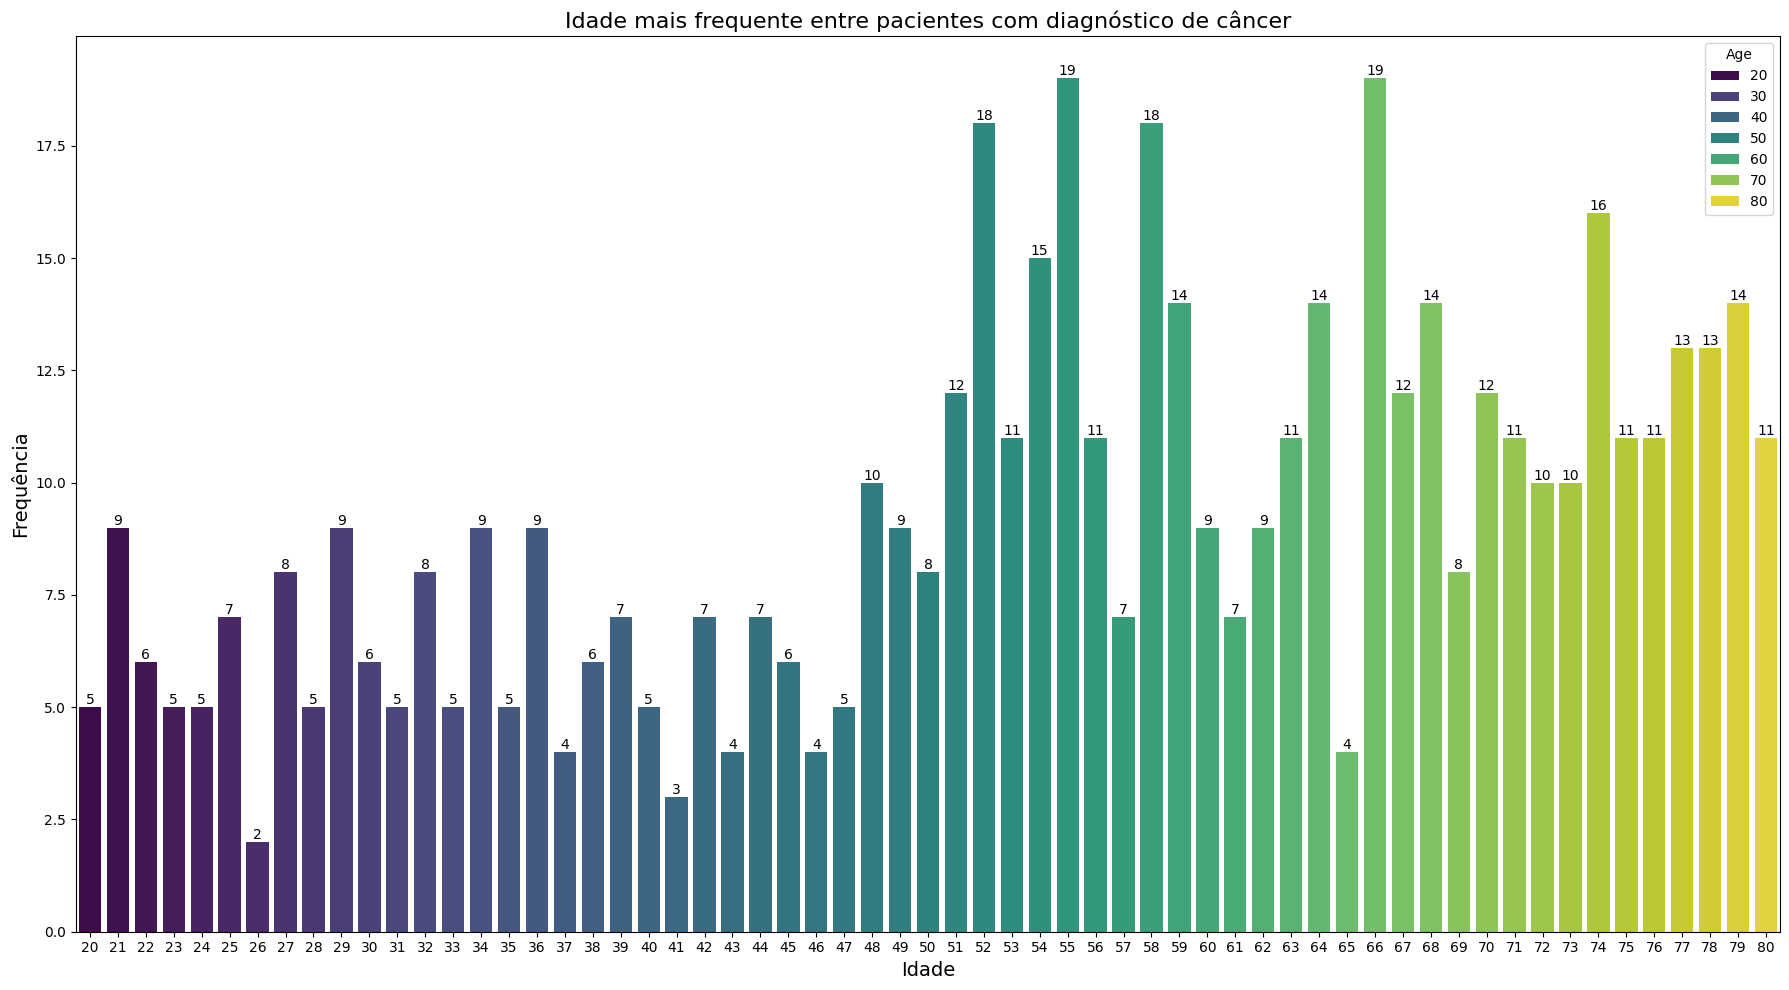

In [26]:
df_cancer = df[df['Diagnosis'] == 1]

contagem = df_cancer['Age'].value_counts().reset_index()
contagem.columns = ['Age', 'Frequência']
contagem = contagem.sort_values(by='Age')  # ordenar para o gráfico ficar correto

plt.figure(figsize=(18, 10))

ax = sns.barplot(
    x='Age',
    y='Frequência',
    data=contagem,
    palette='viridis',
    hue='Age'
    
)

# Adicionar rótulos nos gráficos
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f')

plt.title('Idade mais frequente entre pacientes com diagnóstico de câncer', fontsize=16)
plt.xlabel('Idade', fontsize=14)
plt.ylabel('Frequência', fontsize=14)
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

In [27]:
cancer_sim = df['Diagnosis']==1
df[cancer_sim]['Age'].value_counts()

Age
55    19
66    19
52    18
58    18
74    16
      ..
43     4
65     4
37     4
41     3
26     2
Name: count, Length: 61, dtype: int64

De acordo com o gráfico exibido, podemos notar que as idades com maior frequencia de pessoas diagnosticadas com câncer são 55 e 66 anos. Essas idades estão sendo apresentadas 19 vezes

## 4. Fumantes têm mais câncer que não fumantes?

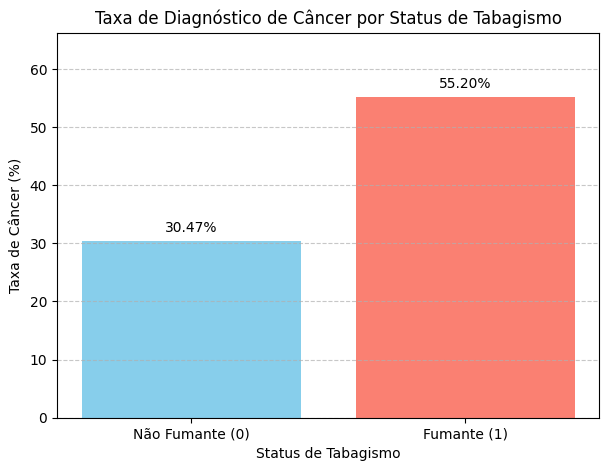

In [28]:

# Calcular a taxa média de 'Diagnosis' (Câncer) para cada grupo de 'Smoking'.
# A média de uma coluna binária (0 e 1) é a proporção de 1s.
cancer_rate = df.groupby('Smoking')['Diagnosis'].mean() * 100 # Multiplica por 100 para percentual

# Preparar os rótulos e valores para o gráfico
data_for_plot = pd.DataFrame({
    'Status de Tabagismo': ['Não Fumante (0)', 'Fumante (1)'],
    'Taxa de Câncer (%)': cancer_rate.values
})

# ----------------------------------------------------
# 2. GERAÇÃO DO GRÁFICO DE BARRAS
# ----------------------------------------------------
plt.figure(figsize=(7, 5))
bars = plt.bar(
    data_for_plot['Status de Tabagismo'], 
    data_for_plot['Taxa de Câncer (%)'], 
    color=['skyblue', 'salmon']
)

# Adicionar os valores percentuais acima de cada barra (rótulos)
for bar in bars:
    yval = bar.get_height()
    # Verifica se há dados para evitar erro em caso de dataset vazio ou erro de cálculo
    if yval > 0:
        plt.text(bar.get_x() + bar.get_width()/2, yval + 1, f'{yval:.2f}%', ha='center', va='bottom')

plt.title('Taxa de Diagnóstico de Câncer por Status de Tabagismo')
plt.xlabel('Status de Tabagismo')
plt.ylabel('Taxa de Câncer (%)')
plt.ylim(0, max(data_for_plot['Taxa de Câncer (%)']) * 1.2 if not data_for_plot.empty else 100)
plt.grid(axis='y', linestyle='--', alpha=0.7)



De acordo com o gráfico percebe-se que pessoas fumantes possuem maior tendência a desenvolver o câncer.

## 5. Qual a proporção das classes da variável alvo? Tem mais pacientes diagnosticados com câncer ou sem câncer? As classes são desbalanceadas?

Contagem das classes:
Sem Câncer (0)    943
Com Câncer (1)    557
Name: count, dtype: int64

Proporção das classes:
Sem Câncer (0)    62.87%
Com Câncer (1)    37.13%
Name: proportion, dtype: object


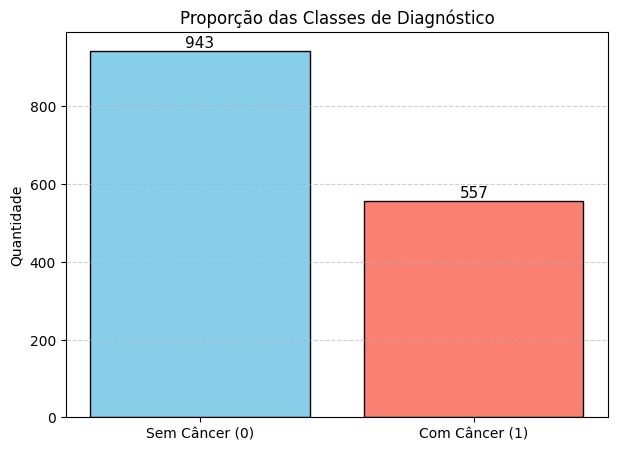

In [29]:
# Carregar dataset
df = pd.read_csv('cancer.csv')
 
# Contagem absoluta das classes
counts = df['Diagnosis'].value_counts().sort_index()
counts.index = ['Sem Câncer (0)', 'Com Câncer (1)']
 
print("Contagem das classes:")
print(counts)
 
# Proporção das classes
proportion = df['Diagnosis'].value_counts(normalize=True).sort_index()
proportion.index = ['Sem Câncer (0)', 'Com Câncer (1)']
 
print("\nProporção das classes:")
print((proportion * 100).round(2).astype(str) + "%")
 
# Gráfico de barras
plt.figure(figsize=(7,5))
plt.bar(counts.index, counts.values, color=['skyblue', 'salmon'], edgecolor='black')
 
plt.title("Proporção das Classes de Diagnóstico")
plt.ylabel("Quantidade")
plt.grid(axis='y', linestyle='--', alpha=0.6)
 
# Adicionar valores acima das barras
for i, v in enumerate(counts.values):
    plt.text(i, v, str(v), ha='center', va='bottom', fontsize=11)
 
plt.show()

A amostragem está desbalanceada, devido a possuir mais pessoas sem câncer do que com câncer.

## 6. Qual a distribuição das variáveis numéricas? Alguma delas apresenta distribuição normal? Ou todas são assimétricas?

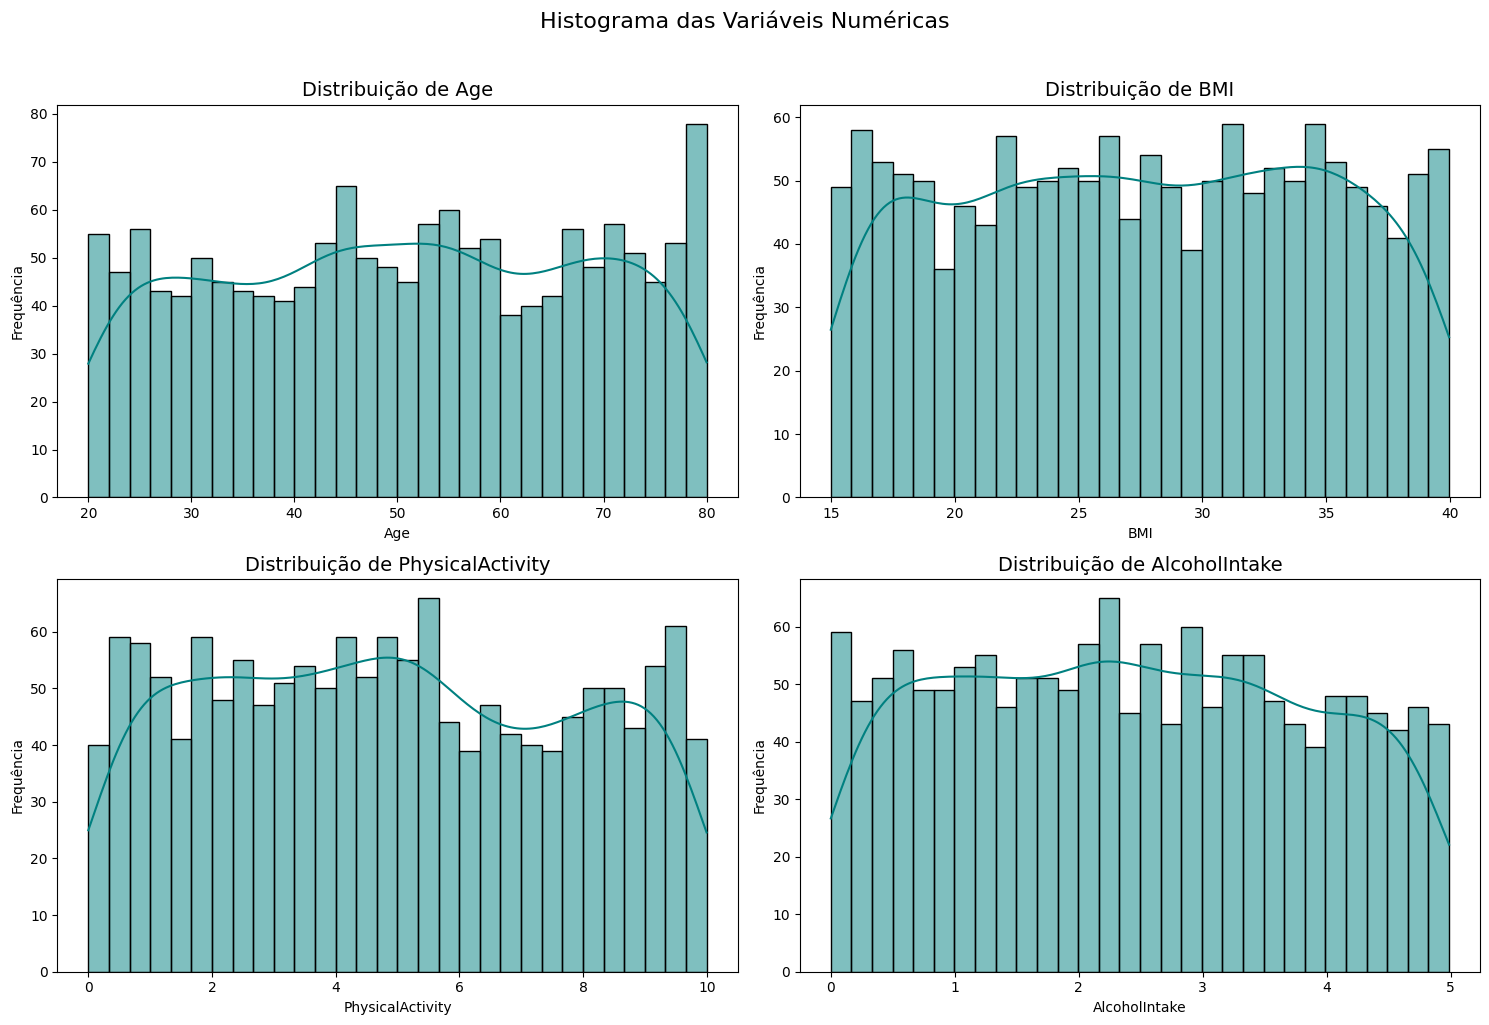

In [30]:
# Colunas a serem excluídas (conforme sua solicitação anterior)
colunas_para_excluir = ['Diagnosis', 'CancerHistory', 'GeneticRisk', 'Smoking', 'Gender']
 
# Criar o DataFrame modificado (apenas variáveis numéricas)
df_modificado = df.drop(columns=colunas_para_excluir, axis=1)
 
# Variáveis para plotar
variaveis_numericas = df_modificado.columns.tolist()
 
# Configuração do Plot
plt.figure(figsize=(15, 10))
plt.suptitle('Histograma das Variáveis Numéricas', fontsize=16, y=1.02)
 
for i, col in enumerate(variaveis_numericas):
    # Cria um subplot (2 linhas, 2 colunas)
    plt.subplot(2, 2, i + 1)
    
    # Gera o histograma com a estimativa de densidade do kernel (KDE)
    # KDE ajuda a visualizar a forma da distribuição
    sns.histplot(df_modificado[col], kde=True, bins=30, color='teal', edgecolor='black')
    
    # Adiciona título e rótulos
    plt.title(f'Distribuição de {col}', fontsize=14)
    plt.xlabel(col)
    plt.ylabel('Frequência')
 
plt.tight_layout()
plt.show()

Podemos observar de acordo com os histograma que os dados são assimétricos.

# ------**Construção do Modelo**--------

## 1. Divisão das variáveis em X e y

In [31]:
X = df['CancerHistory']
y = df['Diagnosis']

## 2. Divisão em treino e teste

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 3. Normalização dos dados

In [33]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train.values.reshape(-1,1))

X_test_scaled = scaler.fit_transform(X_test.values.reshape(-1,1))

## 4. Escolha e Treinamento do Modelo

In [34]:
model = LogisticRegression()

model.fit(X_train_scaled, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


## 5. Previsões

In [35]:
y_pred = model.predict(X_train_scaled)

## 6. Avaliação das previsões

In [36]:
# Avaliação das previsões

relatorio = classification_report(y_train, y_pred)

print("Classification Report:")
print(relatorio)

Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.96      0.82       759
           1       0.83      0.32      0.46       441

    accuracy                           0.73      1200
   macro avg       0.77      0.64      0.64      1200
weighted avg       0.75      0.73      0.69      1200



## 7. Responda: Qual modelo obteve a melhor performance? Compare as métricas de precisão, recall, f1 score e acurácia para responder essa pergunta.



## 8. Agora teste rodar o modelo utilizando os parâmetros de "gini" e "entropy". Qual performou melhor?